# CGEM the Notebook

## Compile the code

In [1]:
!make

gfortran -c    moc_src/singledouble.F90
gfortran -c    moc_src/sw_adtg.F90
gfortran -c    moc_src/sw_ptmp.F90
gfortran -c    moc_src/sw_temp.F90
gfortran -c    moc_src/p80.F90
gfortran -c    moc_src/constants.F90
gfortran -c    moc_src/phsolvers.F90
gfortran -c    moc_src/varsolver.F90
gfortran -c    moc_src/depth2press.F90
gfortran -c    moc_src/rho.F90
gfortran -c    moc_src/rhoinsitu.F90
gfortran -c    moc_src/vars.F90
gfortran -c    moc_src/p2fCO2.F90
gfortran -c    moc_src/gasx.F90
gfortran -c     cgem_src/date_time.F90
gfortran -c     cgem_src/grid_vars.F90
gfortran -c     cgem_src/cgem_vars.F90
gfortran -c     cgem_src/Command_Line_Args.F90
gfortran -c     cgem_src/model_init.F90
gfortran -c     cgem_src/Check_InputFile.F90
gfortran -c     cgem_src/update_grid.F90
gfortran -c     cgem_src/Calc_Chla.F90
gfortran -c     cgem_src/getSolar.F90
gfortran -c     cgem_src/DailyRad_init.F90
gfortran -c     cgem_src/cgem.F90
gfortran -c     cgem_src/SDM.F90
gfortran -c     cgem_src/func_E

## Import CGEM Python functions

In [2]:
from cgem import *

## Try a plot
Options are:

A, Qn, Qp, Z, NO3, NH4, PO4, DIC, O2, OM1_A, OM2_A, OM1_Z, OM2_Z, OM1_R, OM2_R, CDOM, Si, Alk, Tr

Plotting CGEM variable NH4


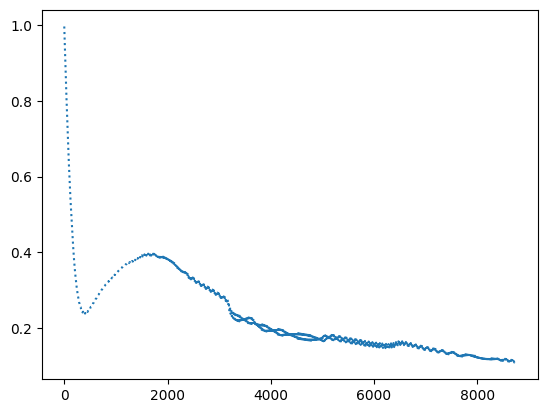

In [3]:
cgem_plot1D("NH4")

## Capture input parameters from namelists

In [4]:
import f90nml
from opentea.noob.asciigraph import nob_asciigraph
cgem_nml = f90nml.read('cgem.nml')
cgem = cgem_nml.todict()
grid_nml = f90nml.read('grid.nml')
grid = grid_nml.todict()
grid

OrderedDict([('grid',
              OrderedDict([('iyrs', 2006),
                           ('imons', 1),
                           ('idays', 1),
                           ('ihrs', 18),
                           ('imins', 0),
                           ('isecs', 0),
                           ('iyre', 2006),
                           ('imone', 12),
                           ('idaye', 31),
                           ('ihre', 18),
                           ('imine', 0),
                           ('isece', 0),
                           ('dt', 3600),
                           ('dt_out', 3600),
                           ('lon_in', -92.39),
                           ('lat_in', 29.03),
                           ('depth_in', 20.0),
                           ('rad_in', 1.0),
                           ('s_init', 30.0),
                           ('t_init', 16.0)]))])

## Grid/time params are in 'grid', CGEM vars/switches are in cgem.
You can get an element with 'get'.

In [5]:
grid.get('grid').get('iyrs')

2006

## CGEM Python functions available are:
- cgem_plot1D(var) - makes a 1D plot of a state variable 'var'
- cgem_getvar(var) - gets a state variable 'var'
- cgem_timearray(var, grid) - creates a time array starting with start of simulation until the variable stops (in case it crashes, it uses length of variable)
- cgem_tstart(grid) - gets datetime object for start of simulation
- cgem_tend(grid) - ditto end of simulation

In [6]:
A = cgem_getvar("A")

Calculating CGEM variable A


<function matplotlib.pyplot.show(close=None, block=None)>

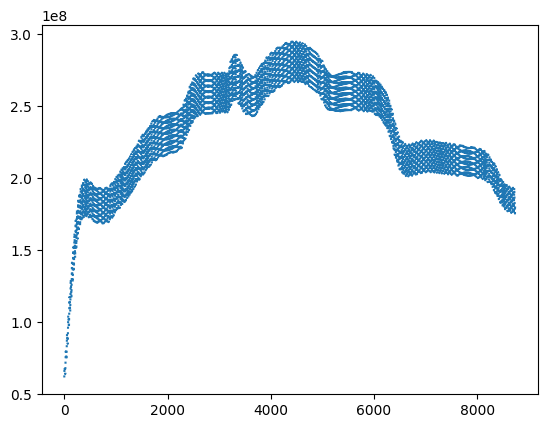

In [7]:
plt.plot(A,linestyle='dotted')
plt.show

In [8]:
Tstart=cgem_tstart(grid)
Tend=cgem_tend(grid)
print(Tstart)
print(Tend)

2006-01-01 18:00:00
2006-12-31 18:00:00


In [9]:
T = cgem_timearray(A,grid)

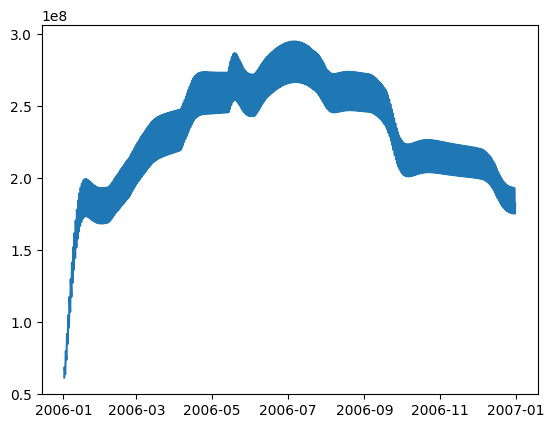

In [10]:
plt.plot(T,A)

## Remember you have to 'get' the variable before getting a time array.  
You can make a plot without time, it will just have the x axis as timesteps

In [11]:
Z = cgem_getvar('Z')
NO3 = cgem_getvar('NO3')
NH4 = cgem_getvar('NH4')
PO4 = cgem_getvar('PO4')

Calculating CGEM variable Z
Calculating CGEM variable NO3
Calculating CGEM variable NH4
Calculating CGEM variable PO4


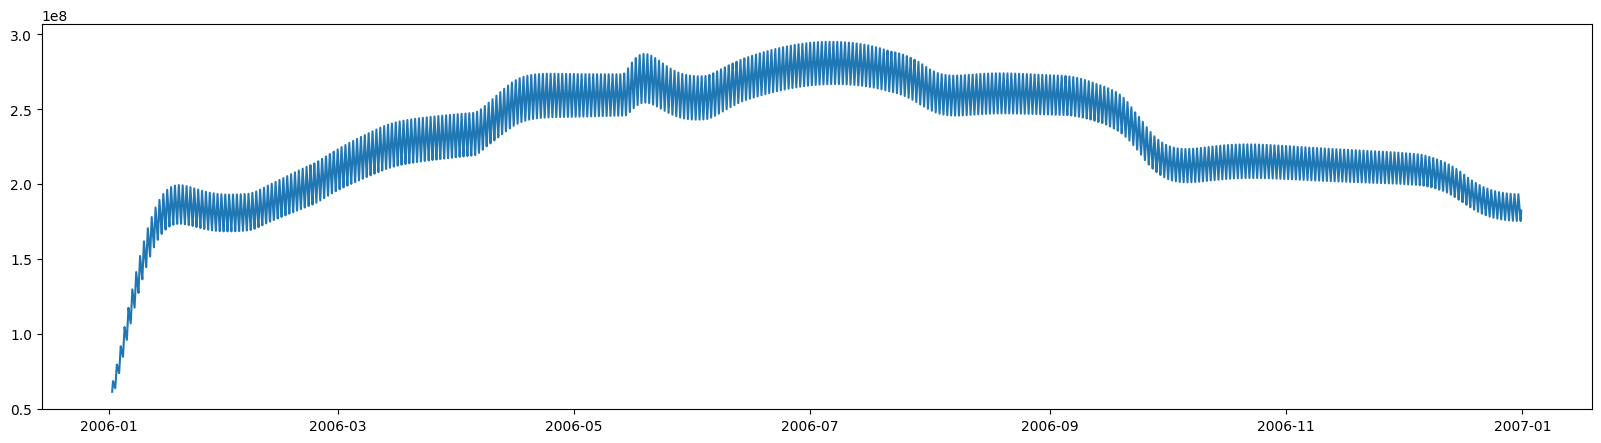

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,A)

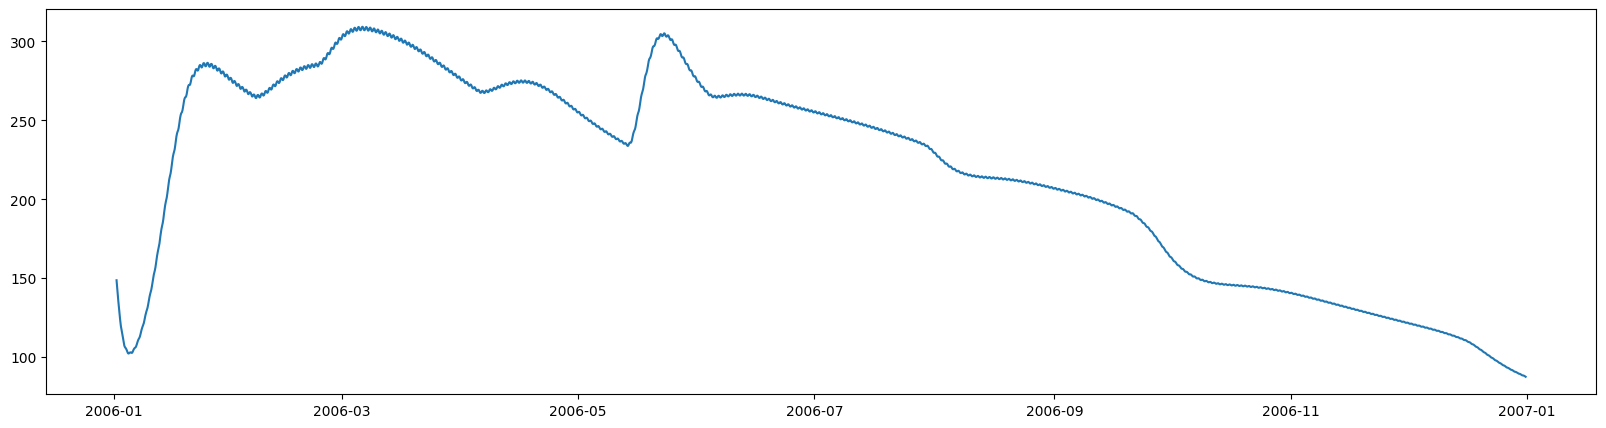

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,Z)

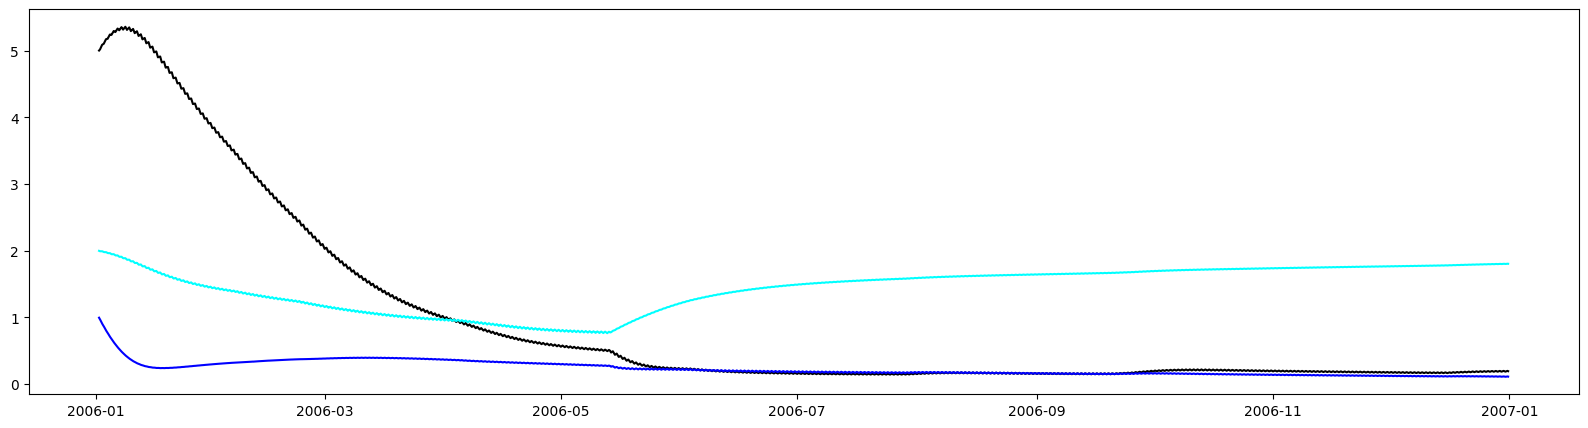

In [245]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,NO3, color='black')
ax.plot(T,NH4, color='blue')
ax.plot(T,PO4, color='cyan')